<a href="https://colab.research.google.com/github/7208221032113/Nauffal/blob/main/ratingpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set()

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
orders_df = pd.read_csv("/content/zomato.csv")

orders_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [19]:
orders_df.shape

(606, 17)

In [21]:
orders_df.rename(columns = {'approx_cost(for two people)': 'approx_cost', 'listed_in(city)': 'area'}, inplace = True)

In [24]:
orders_df.drop([ "url", "address", "menu_item", "reviews_list", "dish_liked", "phone", "listed_in(type)" ], axis=1, inplace=True)
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          605 non-null    object 
 1   online_order  605 non-null    object 
 2   book_table    605 non-null    object 
 3   rate          557 non-null    object 
 4   votes         605 non-null    float64
 5   location      605 non-null    object 
 6   rest_type     605 non-null    object 
 7   cuisines      605 non-null    object 
 8   approx_cost   605 non-null    object 
 9   area          605 non-null    object 
dtypes: float64(1), object(9)
memory usage: 47.5+ KB


In [26]:
orders_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.7/5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '-', '2.8 /5', '3.6 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.4 /5', '3.2 /5', '2.6 /5',
       '4.5 /5', '2.5/5'], dtype=object)

In [29]:
orders_df['rate'] = orders_df['rate'].str.replace("/5", "")

orders_df['rate'] = orders_df['rate'].str.replace("nan", "NaN")
orders_df['rate'] = orders_df['rate'].str.replace("NEW", "NaN")

orders_df['rate'] = orders_df['rate'].str.replace("-", "NaN")

orders_df['rate'] = orders_df['rate'].str.replace("/5", "")
orders_df['rate'] = orders_df['rate'].fillna(np.nan)

orders_df['rate'] = orders_df['rate'].str.replace("", "")

orders_df['rate'] = orders_df['rate'].str.replace("/5", "")
orders_df['rate'] = orders_df['rate'].fillna(np.nan)

orders_df['rate'] = orders_df['rate'].str.replace("", "")

In [30]:
orders_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.7', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.6 ', '3.5 ',
       '2.7 ', '2.5 ', '3.4 ', '3.2 ', '2.6 ', '4.5 ', '2.5'],
      dtype=object)

In [32]:
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,100', '2,200', '1,500', '1,300', nan],
      dtype=object)

In [34]:
orders_df['approx_cost'] = orders_df['approx_cost'].str.replace("nan", "NaN")
orders_df['approx_cost'] = orders_df['approx_cost'].fillna('NaN')

orders_df['approx_cost'] = orders_df['approx_cost'].str.replace(",", "")

In [35]:
orders_df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1100', '2200', '1500', '1300', 'NaN'], dtype=object)

In [37]:
orders_df['approx_cost'] = orders_df['approx_cost'].astype(float)

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          605 non-null    object 
 1   online_order  605 non-null    object 
 2   book_table    605 non-null    object 
 3   rate          557 non-null    object 
 4   votes         605 non-null    float64
 5   location      605 non-null    object 
 6   rest_type     605 non-null    object 
 7   cuisines      605 non-null    object 
 8   approx_cost   605 non-null    float64
 9   area          605 non-null    object 
dtypes: float64(2), object(8)
memory usage: 47.5+ KB


In [39]:
orders_df.isna().sum()

,0
name,1
online_order,1
book_table,1
rate,49
votes,1
location,1
rest_type,1
cuisines,1
approx_cost,1
area,1


In [41]:
(orders_df.isna().sum() / orders_df.shape[0])*100

,0
name,0.165017
online_order,0.165017
book_table,0.165017
rate,8.085809
votes,0.165017
location,0.165017
rest_type,0.165017
cuisines,0.165017
approx_cost,0.165017
area,0.165017


In [43]:
orders_df = orders_df[orders_df["location"].notna()]
orders_df = orders_df[orders_df["rest_type"].notna()]
orders_df = orders_df[orders_df["cuisines"].notna()]

orders_df = orders_df[orders_df["approx_cost"].notna()]

#Verifying the results

orders_df.isna().sum()

#Verifying the results

orders_df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,48
votes,0
location,0
rest_type,0
cuisines,0
approx_cost,0
area,0


In [54]:
orders_df['rate'].describe()

,rate
count,557
unique,42
top,3.8
freq,74


In [56]:
# Convert 'rate' column to numeric, handling non-numeric values
orders_df['rate'] = pd.to_numeric(orders_df['rate'], errors='coerce')

# Drop rows with NaN values in 'rate' column, which were previously non-numeric
orders_df = orders_df.dropna(subset=['rate'])

# Now calculate the quantiles
q1 = orders_df['rate'].quantile(0.25)
q3 = orders_df['rate'].quantile(0.75)
iqr = q3 - q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)
outliers = len(orders_df[(orders_df['rate'] < lower_range) | (orders_df['rate'] > upper_range)])

print("Number of Rows having Outliers", outliers)

Number of Rows having Outliers 32


In [57]:
orders_df['rate'] = orders_df['rate'].fillna (orders_df['rate'].median())

orders_df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost,0
area,0


In [59]:
orders_df.reset_index(inplace=True)

orders_df.drop(['index'], axis=1, inplace=True)

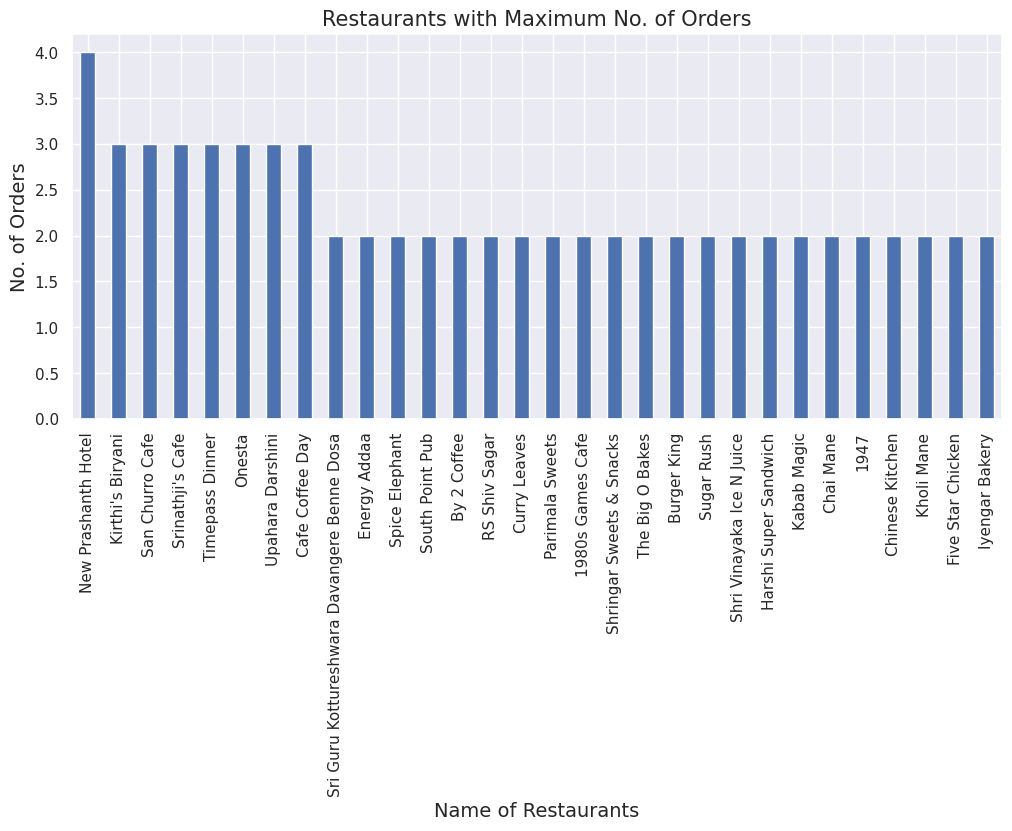

In [62]:
plt.figure(figsize = (12,5))

data=orders_df['name'].value_counts() [:30]

data.plot(kind = 'bar')

plt.xlabel('Name of Restaurants', size= 14)

plt.ylabel('No. of Orders', size = 14)

plt.title("Restaurants with Maximum No. of Orders", fontsize=15)

plt.show()

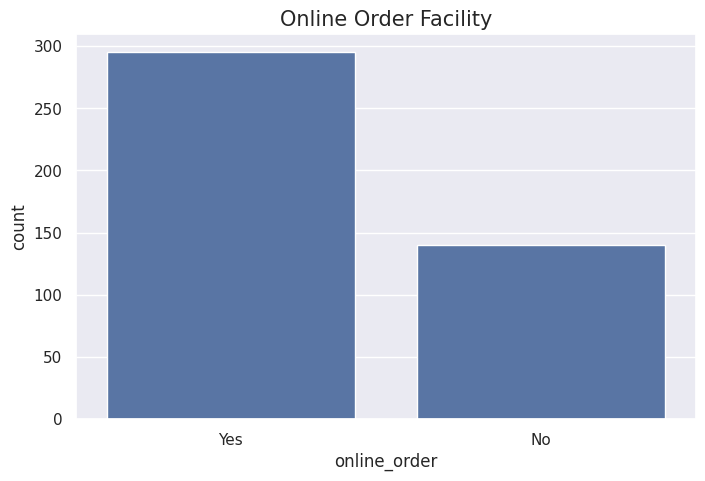

In [64]:
data = orders_df[['name', 'online_order']].drop_duplicates()

data = orders_df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,5))

ax= sns.countplot(x="online_order", data=data)
plt.title('Online Order Facility', fontsize = 15)
plt.show()

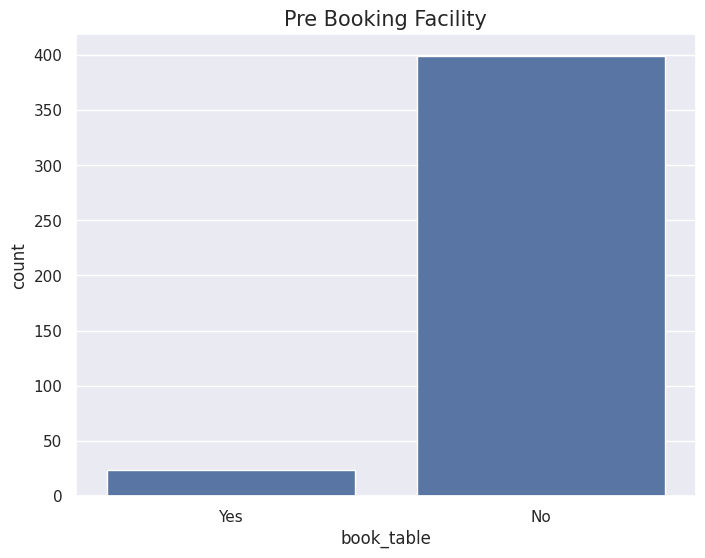

In [66]:
data=orders_df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,6))
ax= sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 15)

plt.show()

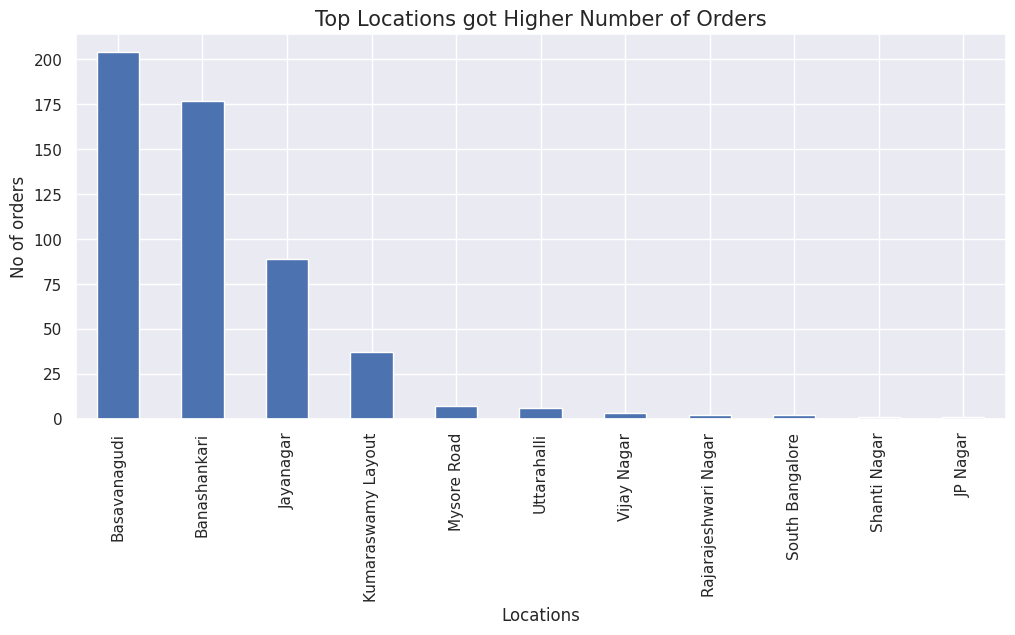

In [68]:
plt.figure(figsize = (12,5))

data = orders_df.location.value_counts()[0:25]

data.plot(kind='bar')

plt.xlabel('Locations')

plt.ylabel('No of orders')

plt.title('Top Locations got Higher Number of Orders', size=15)

plt.show()

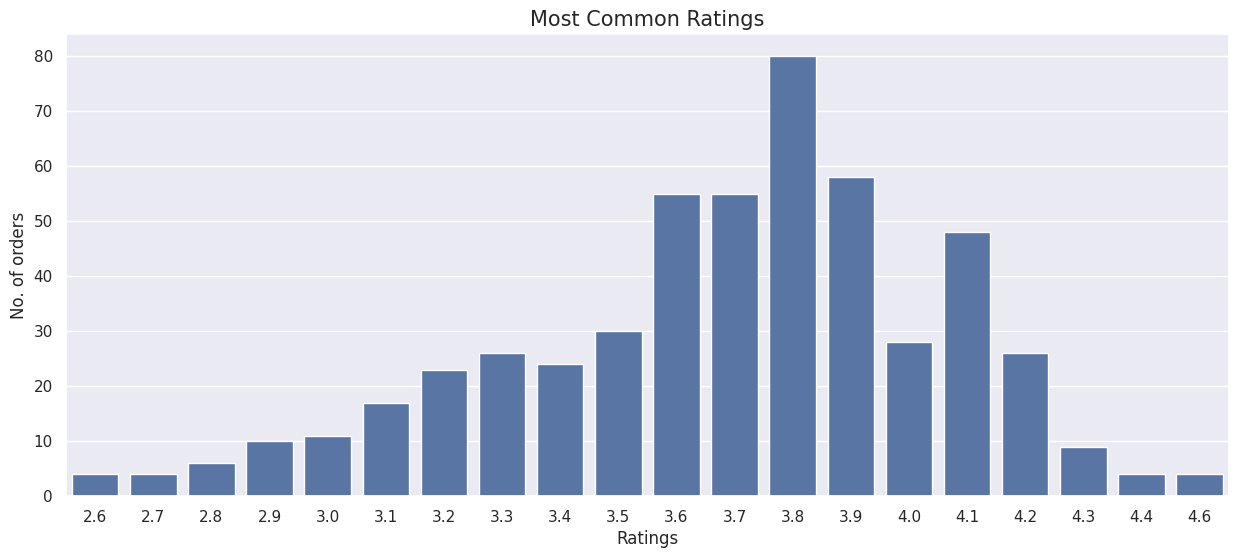

In [72]:
data= orders_df.rate.value_counts().reset_index() [0:20]

plt.figure(figsize=(15,6))

# The column name after reset_index is likely 'level_0' or a similar alternative
# because the original index was a MultiIndex and the column 'index' already existed.
# Change 'index' to the correct column name, likely 'level_0' or 'rate'.
sns.barplot(x=data['rate'], y=data['count']) # Assuming 'rate' is the correct column name after reset_index

plt.xlabel('Ratings')

plt.ylabel('No. of orders')

plt.title('Most Common Ratings', size=15)

plt.show()

In [73]:
data = pd.DataFrame(orders_df["approx_cost"].value_counts().reset_index()[:20])


data.columns = ['approx_cost', 'count']

data= data.set_index('approx_cost')

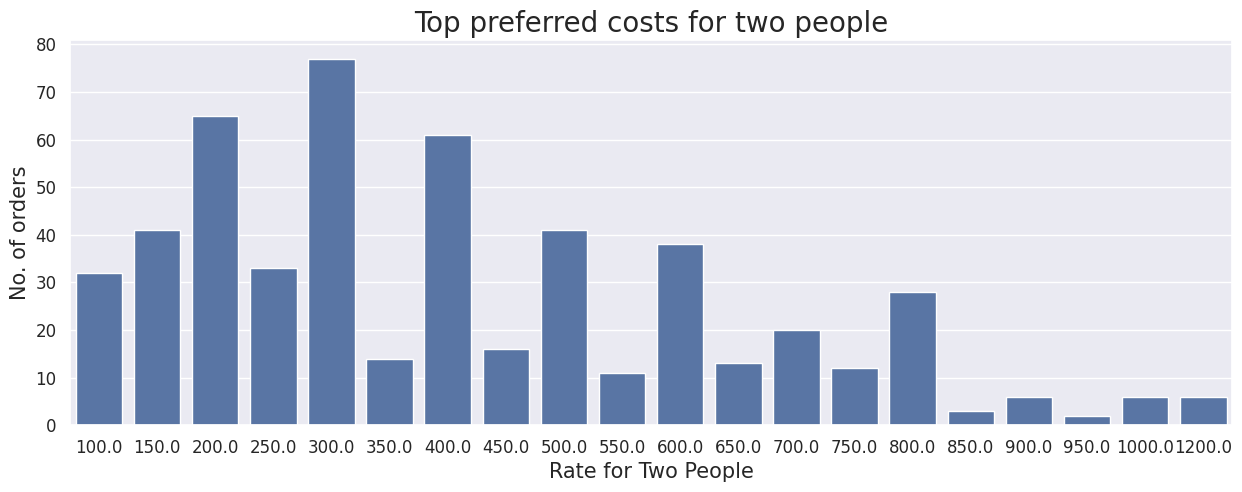

In [75]:
plt.figure(figsize = (15, 5))

sns.barplot(x = data.index, y = data["count"])
plt.xlabel("Rate for Two People", size=15)

plt.ylabel("No. of orders", size=15)

plt.xticks(size=12)

plt.yticks(size=12)

plt.title("Top preferred costs for two people", size = 20)

plt.show()

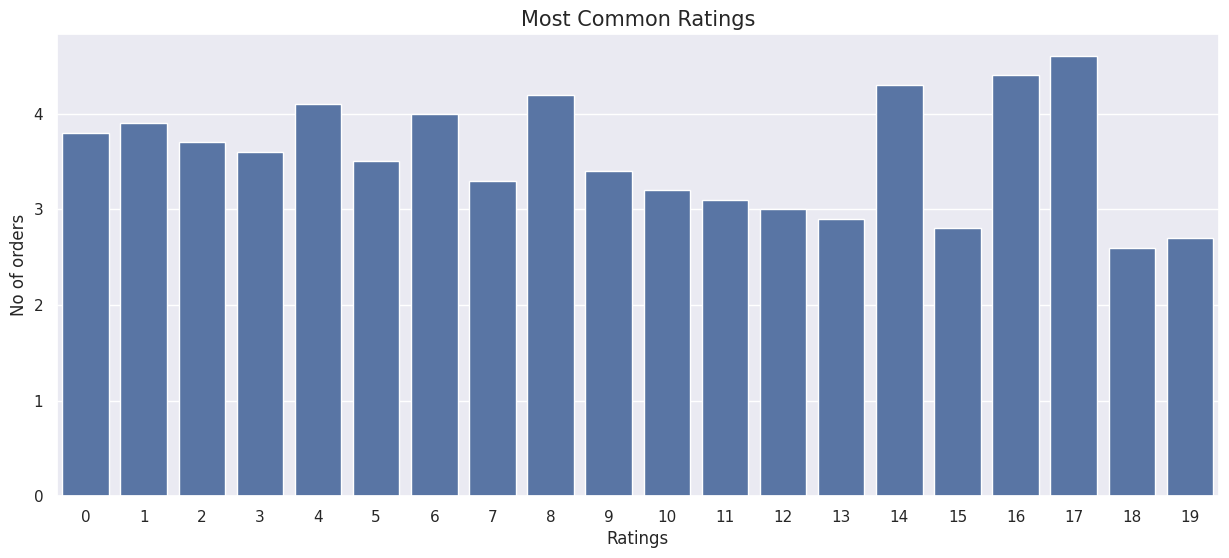

In [95]:
data= orders_df.rate.value_counts().reset_index() [0:20]

plt.figure(figsize = (15,6))

sns.barplot(x = data.index, y = data['rate'])

plt.xlabel('Ratings')

plt.ylabel('No of orders')

plt.title ('Most Common Ratings', size = 15)

plt.show()

In [91]:
data = pd.DataFrame(orders_df["approx_cost"].value_counts().reset_index()[20:])
data.columns = ['approx_cost', 'count']

data= data.set_index('approx_cost')

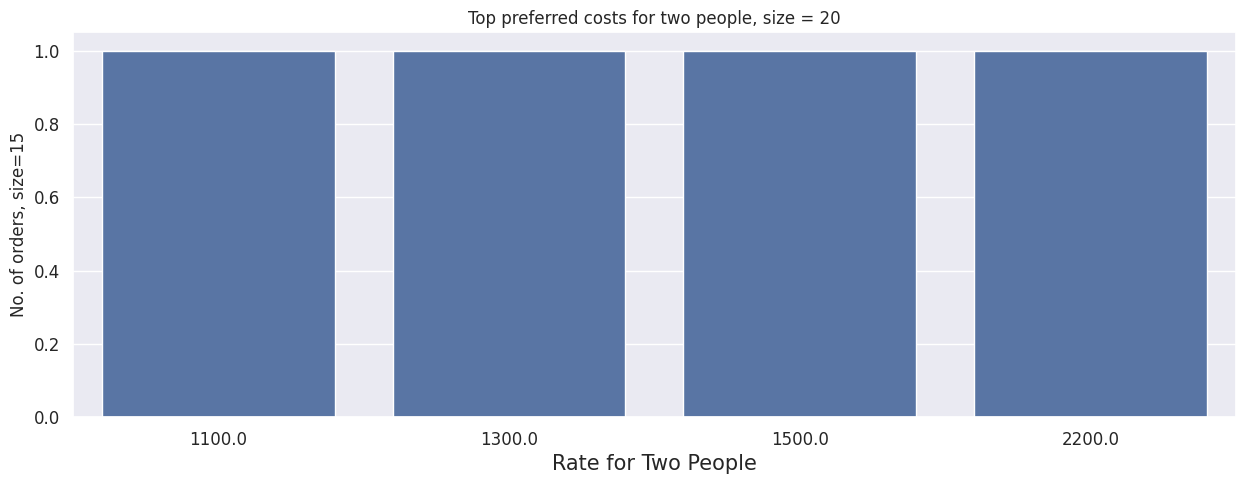

In [93]:
plt.figure(figsize=(15,5))

sns.barplot(x = data.index, y = data['count'])

plt.xlabel('Rate for Two People', size=15)

plt.ylabel('No. of orders, size=15')

plt.xticks(size=12)

plt.yticks(size=12)

plt.title('Top preferred costs for two people, size = 20')

plt.show()

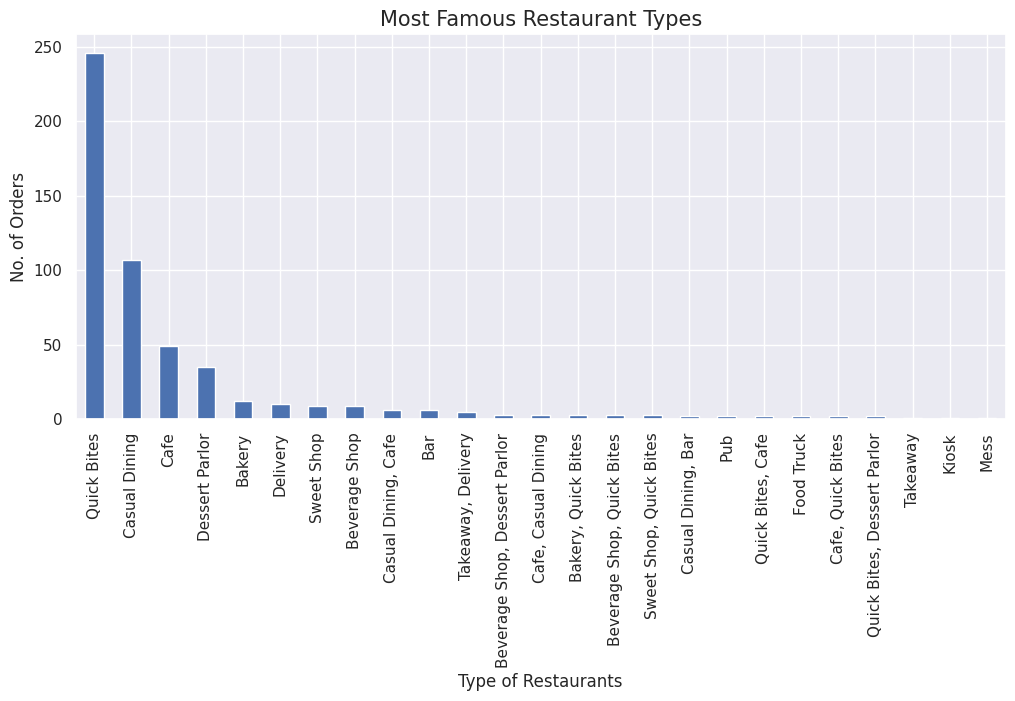

In [96]:
plt.figure(figsize=(12,5))

ax= orders_df.rest_type.value_counts() [:25]

ax.plot(kind='bar')

plt.title("Most Famous Restaurant Types", fontsize=15)

plt.xlabel("Type of Restaurants")

plt.ylabel("No. of Orders")

plt.show()

In [98]:
orders_df["online_order"]= orders_df['online_order'].replace({"Yes": 1, "No":8})

orders_df.head()

,level_0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,0,Jalsa,1,Yes,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,1,Spice Elephant,1,No,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,2,San Churro Cafe,1,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,3,Addhuri Udupi Bhojana,8,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,4,Grand Village,8,No,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [99]:
orders_df['book_table'] = orders_df["book_table"].replace({"Yes": 1, "No":0})

orders_df.head()

,level_0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,0,Jalsa,1,1,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,1,Spice Elephant,1,0,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,2,San Churro Cafe,1,0,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,3,Addhuri Udupi Bhojana,8,0,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,4,Grand Village,8,0,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [101]:
rest_df = pd.DataFrame(orders_df['rest_type'])
rts = list(rest_df.rest_type.str.split(","))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)

rest_df.head()

,rest_type,Sweet Shop,Delivery,Dessert Parlor,Fine Dining,Bar,Casual Dining,Pub,Cafe,Quick Bites,...,Delivery,Bar,Cafe,Dessert Parlor,Bakery,Takeaway,Sweet Shop,Mess,Food Truck,Kiosk
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
count = 0

for i in rts:
   rest_df.loc[count, i] = int(1)
   count+=1

In [104]:
rest_df.head()

,rest_type,Sweet Shop,Delivery,Dessert Parlor,Fine Dining,Bar,Casual Dining,Pub,Cafe,Quick Bites,...,Delivery,Bar,Cafe,Dessert Parlor,Bakery,Takeaway,Sweet Shop,Mess,Food Truck,Kiosk
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
rest_df.drop(['rest_type'], axis=1, inplace=True)
rest_df.head()

,Sweet Shop,Delivery,Dessert Parlor,Fine Dining,Bar,Casual Dining,Pub,Cafe,Quick Bites,Quick Bites,...,Delivery,Bar,Cafe,Dessert Parlor,Bakery,Takeaway,Sweet Shop,Mess,Food Truck,Kiosk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
import pandas as pd

cuisines_df = pd.DataFrame(orders_df['cuisines'])

cuisines = list(cuisines_df.cuisines.str.split(", "))

unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe")

unique_cuisines.remove("Bakery")

for cs in unique_cuisines:
    cuisines_df[cs] = 0

cuisines_df.head()

,cuisines,American,Bengali,Ice Cream,Mexican,Vietnamese,Finger Food,South Indian,Pizza,Afghani,...,Salad,Hyderabadi,Indonesian,Rajasthani,Momos,Steak,Goan,Mangalorean,Healthy Food,Street Food
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
corrected_cuisines = []

for i in cuisines:
    # Indented block for the for loop
    if "Cafe" in i:
        i.remove("Cafe")

    if "Bakery" in i:
        i.remove("Bakery")

    corrected_cuisines.append(list(set(i)))

In [120]:
import pandas as pd

# Sample data (replace with your actual data)
data = {'rate': [4.5, 3.8, 5.0, 4.2, 3.5],
        'feature1': [1, 0, 1, 1, 0],
        'feature2': [0, 1, 1, 0, 1]}
df = pd.DataFrame(data)

data_with_location = df  # Assign your DataFrame to 'data_with_location'

X1 = data_with_location.drop(["rate"], axis=1).values
Y1 = data_with_location["rate"].values

print("X", X1)
print()
print("Y", Y1)

X [[1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]]

Y [4.5 3.8 5.  4.2 3.5]


In [122]:
import pandas as pd

# Assuming data_with_area is meant to be the same as data_with_location
# from the previous cell
data_with_area = data_with_location  # Or load your actual data_with_area DataFrame

X2 = data_with_area.drop("rate", axis=1).values
Y2 = data_with_area["rate"].values

print("X", X2)  # Corrected the variable name to X2

print()

print("Y = ", Y2)

X [[1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]]

Y =  [4.5 3.8 5.  4.2 3.5]


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming data_with_area is meant to be the same as data_with_location
# from the previous cell
data_with_area = data_with_location  # Or load your actual data_with_area DataFrame

X2 = data_with_area.drop("rate", axis=1).values
Y2 = data_with_area["rate"].values

print("X", X2)  # Corrected the variable name to X2

print()

print("Y = ", Y2)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=45)

X [[1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]]

Y =  [4.5 3.8 5.  4.2 3.5]


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming data_with_location contains your data
# ... (Load or define data_with_location) ...

X1 = data_with_location.drop(["rate"], axis=1).values
Y1 = data_with_location["rate"].values

# Split X1 and Y1 into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=45)

lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train) # Now X1_train and Y1_train are defined

LinearRegression()

In [132]:
Y_lr1 = lr1.predict(X1_test)

Y_lr1[:100]

array([3.5])

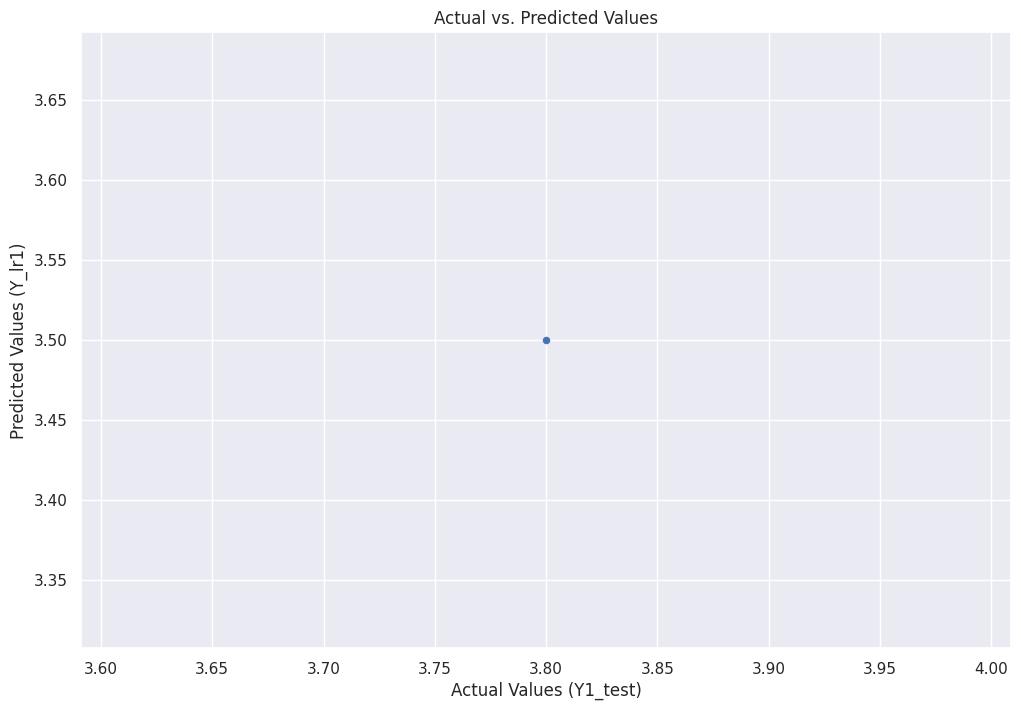

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Use a scatter plot to compare actual vs. predicted values
sns.scatterplot(x=Y1_test, y=Y_lr1)
plt.xlabel("Actual Values (Y1_test)")
plt.ylabel("Predicted Values (Y_lr1)")
plt.title("Actual vs. Predicted Values")

# Optionally, you can add a regression line
sns.regplot(x=Y1_test, y=Y_lr1, scatter=False, color='red')

plt.show()

In [137]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [144]:
Y_1r2 = lr2.predict(X2_test) # Use lr2 for prediction instead of Y_1r2


print(Y_1r2[:100])

[3.5]


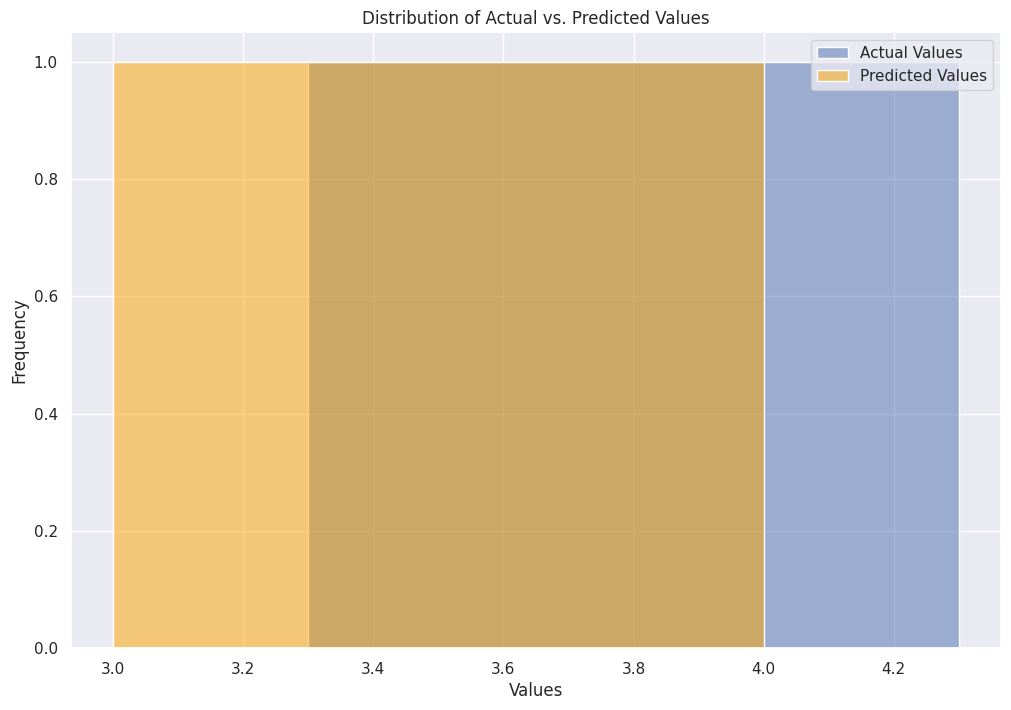

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot the distribution of actual values (Y2_test)
sns.histplot(Y2_test, label="Actual Values", kde=True)

# Plot the distribution of predicted values (Y_1r2)
sns.histplot(Y_1r2, label="Predicted Values", kde=True, color='orange')

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()  # Show the legend to distinguish between the two distributions

plt.show()

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train) # Changed Yi_train to Y1_train, assuming it was a typo

RandomForestRegressor()

In [153]:
Y_rf1 = rf1.predict(X1_test)
# Check the shape and size of Y_rf1
print("Shape of Y_rf1:", Y_rf1.shape)
print("Size of Y_rf1:", Y_rf1.size)

# Access the first element of Y_rf1 (index 0)
print("First element of Y_rf1:", Y_rf1[0])

# Avoid trying to access elements beyond the bounds of the array
# For example, if you want the last element, use Y_rf1[-1]

Shape of Y_rf1: (1,)
Size of Y_rf1: 1
First element of Y_rf1: 3.88025


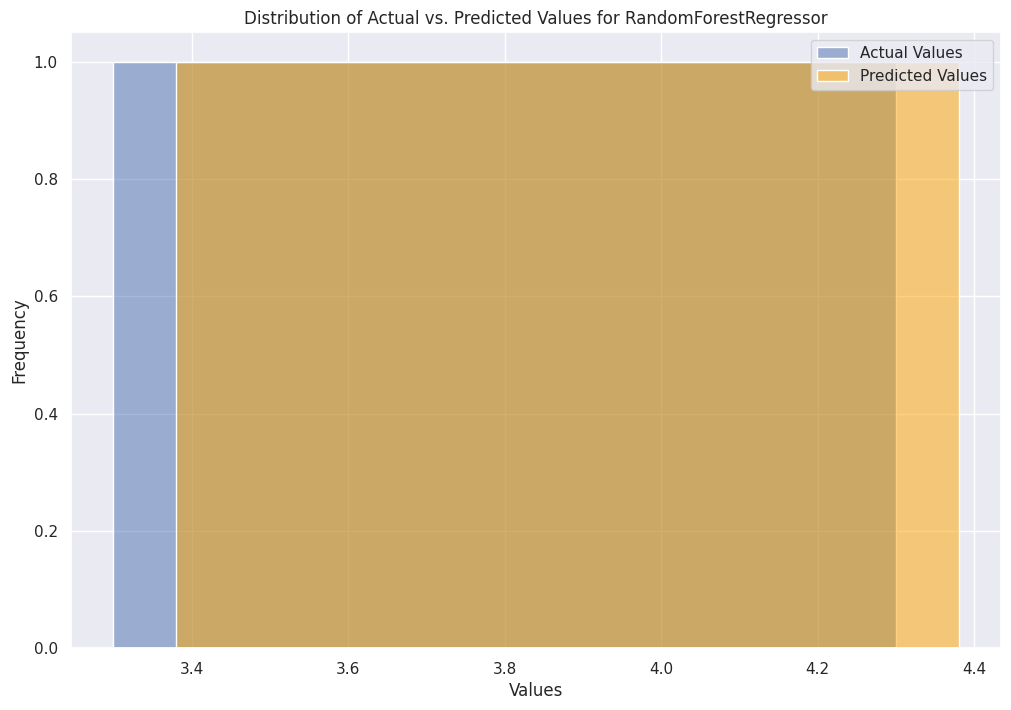

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot the distribution of actual values (Y1_test)
sns.histplot(Y1_test, label="Actual Values", kde=True)

# Plot the distribution of predicted values (Y_rf1)
sns.histplot(Y_rf1, label="Predicted Values", kde=True, color='orange')

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs. Predicted Values for RandomForestRegressor")
plt.legend()  # Show the legend to distinguish between the two distributions

plt.show()

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [159]:
Y_rf2 = rf2.predict(X2_test)

Y_rf2[:100]

array([3.8855])

<Figure size 1200x800 with 0 Axes>

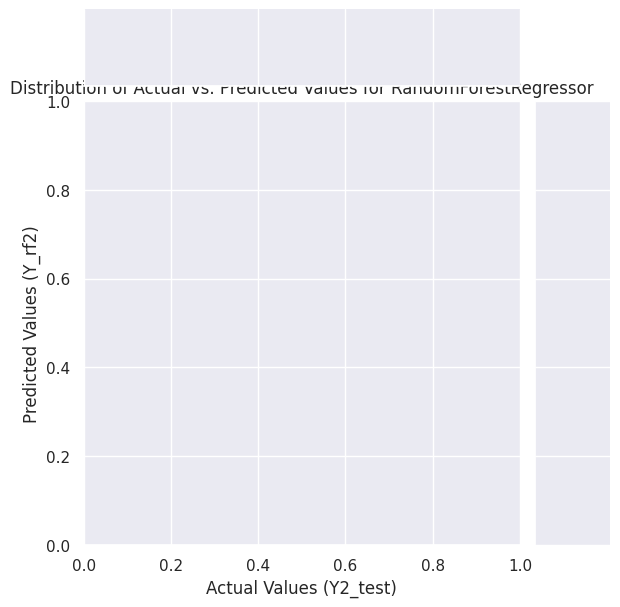

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Option 1: Overlay two histplots
# sns.histplot(Y2_test, label="Actual Values", kde=True, bins=100, color='blue', alpha=0.5)
# sns.histplot(Y_rf2, label="Predicted Values", kde=True, bins=100, color='orange', alpha=0.5)

# Option 2: Use a jointplot for bivariate distribution
sns.jointplot(x=Y2_test, y=Y_rf2, kind="kde", fill=True)

# Common plot settings (for both options)
plt.xlabel("Actual Values (Y2_test)")
plt.ylabel("Predicted Values (Y_rf2)")
plt.title("Distribution of Actual vs. Predicted Values for RandomForestRegressor")
# plt.legend() # Legend is not needed for jointplot

plt.show()

In [165]:
dt1= DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [168]:
# Instead of trying to access Y_dt1[100],
# access the single predicted value at index 0:
Y_dt1[0]

# Alternatively, if you expect Y_dt1 to have more elements,
# you need to ensure that X1_test has more data points for prediction.

3.5

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Use Regressor for continuous target
from sklearn.metrics import mean_squared_error, r2_score  # Use appropriate metrics

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize and train a regressor (using Random Forest in this example)
model = RandomForestRegressor()  # Changed to RandomForestRegressor
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate relevant metrics for regression
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0019360000000000035
R-squared: nan


In [175]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate relevant metrics for regression
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.0019360000000000035
Root Mean Squared Error (RMSE): 0.04400000000000004
Mean Absolute Error (MAE): 0.04400000000000004
R-squared (R²): nan


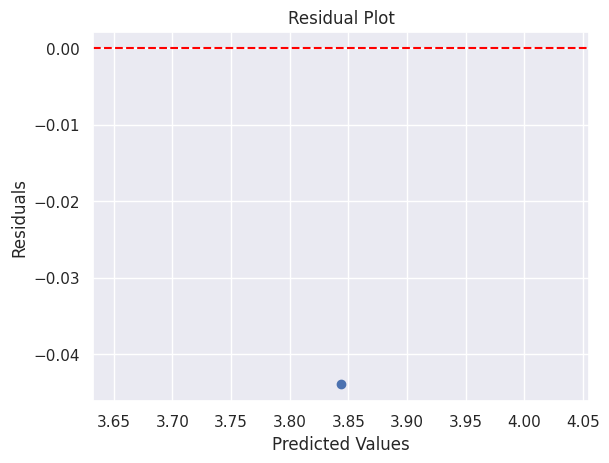

In [176]:
import matplotlib.pyplot as plt

residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()


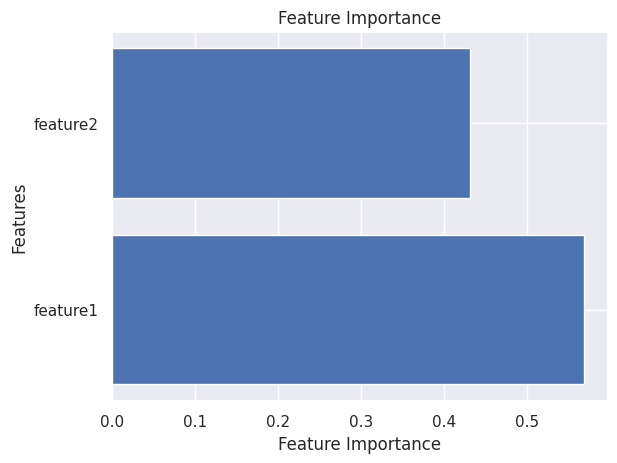

In [177]:
feature_importances = model.feature_importances_
features = data_with_location.drop(["rate"], axis=1).columns

# Plot feature importances
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [178]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X1, Y1, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())


Cross-Validation MSE Scores: [2.54402500e-02 6.50250000e-04 1.19246400e+00 1.39689063e-01
 3.90000250e-01]
Mean Cross-Validation MSE: 0.3496487625000012


In [179]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R-squared:", r2_score(Y_test, Y_pred_ridge))


Ridge Regression R-squared: nan


In [180]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'final_model.pkl')

# Load the saved model for future predictions
loaded_model = joblib.load('final_model.pkl')


In [181]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(model, 'trained_model.pkl')

print("Model saved successfully as 'trained_model.pkl'")


Model saved successfully as 'trained_model.pkl'


In [182]:
import joblib

# Load the saved model from the .pkl file
loaded_model = joblib.load('trained_model.pkl')
print("Model loaded successfully.")


Model loaded successfully.


In [183]:
# Make predictions using the loaded model
Y_pred_loaded = loaded_model.predict(X_test)

# Print a few predictions (optional)
print("Predictions on test data:", Y_pred_loaded[:5])  # Show first 5 predictions


Predictions on test data: [3.844]


In [184]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on the test set
mse = mean_squared_error(Y_test, Y_pred_loaded)
rmse = mean_squared_error(Y_test, Y_pred_loaded, squared=False)  # RMSE
mae = mean_absolute_error(Y_test, Y_pred_loaded)
r2 = r2_score(Y_test, Y_pred_loaded)

print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Test Set Evaluation:
Mean Squared Error (MSE): 0.0019360000000000035
Root Mean Squared Error (RMSE): 0.04400000000000004
Mean Absolute Error (MAE): 0.04400000000000004
R-squared (R²): nan
